# Error and Bias Analysis

#### Our focus hs been to compare alse predditions between models, and how close the modes were to being correct. Analysis shown below where there are persistent errors between models and an idea how to improve categorisation. 

#### Below shows false predicitons comparing true and predicted categories.

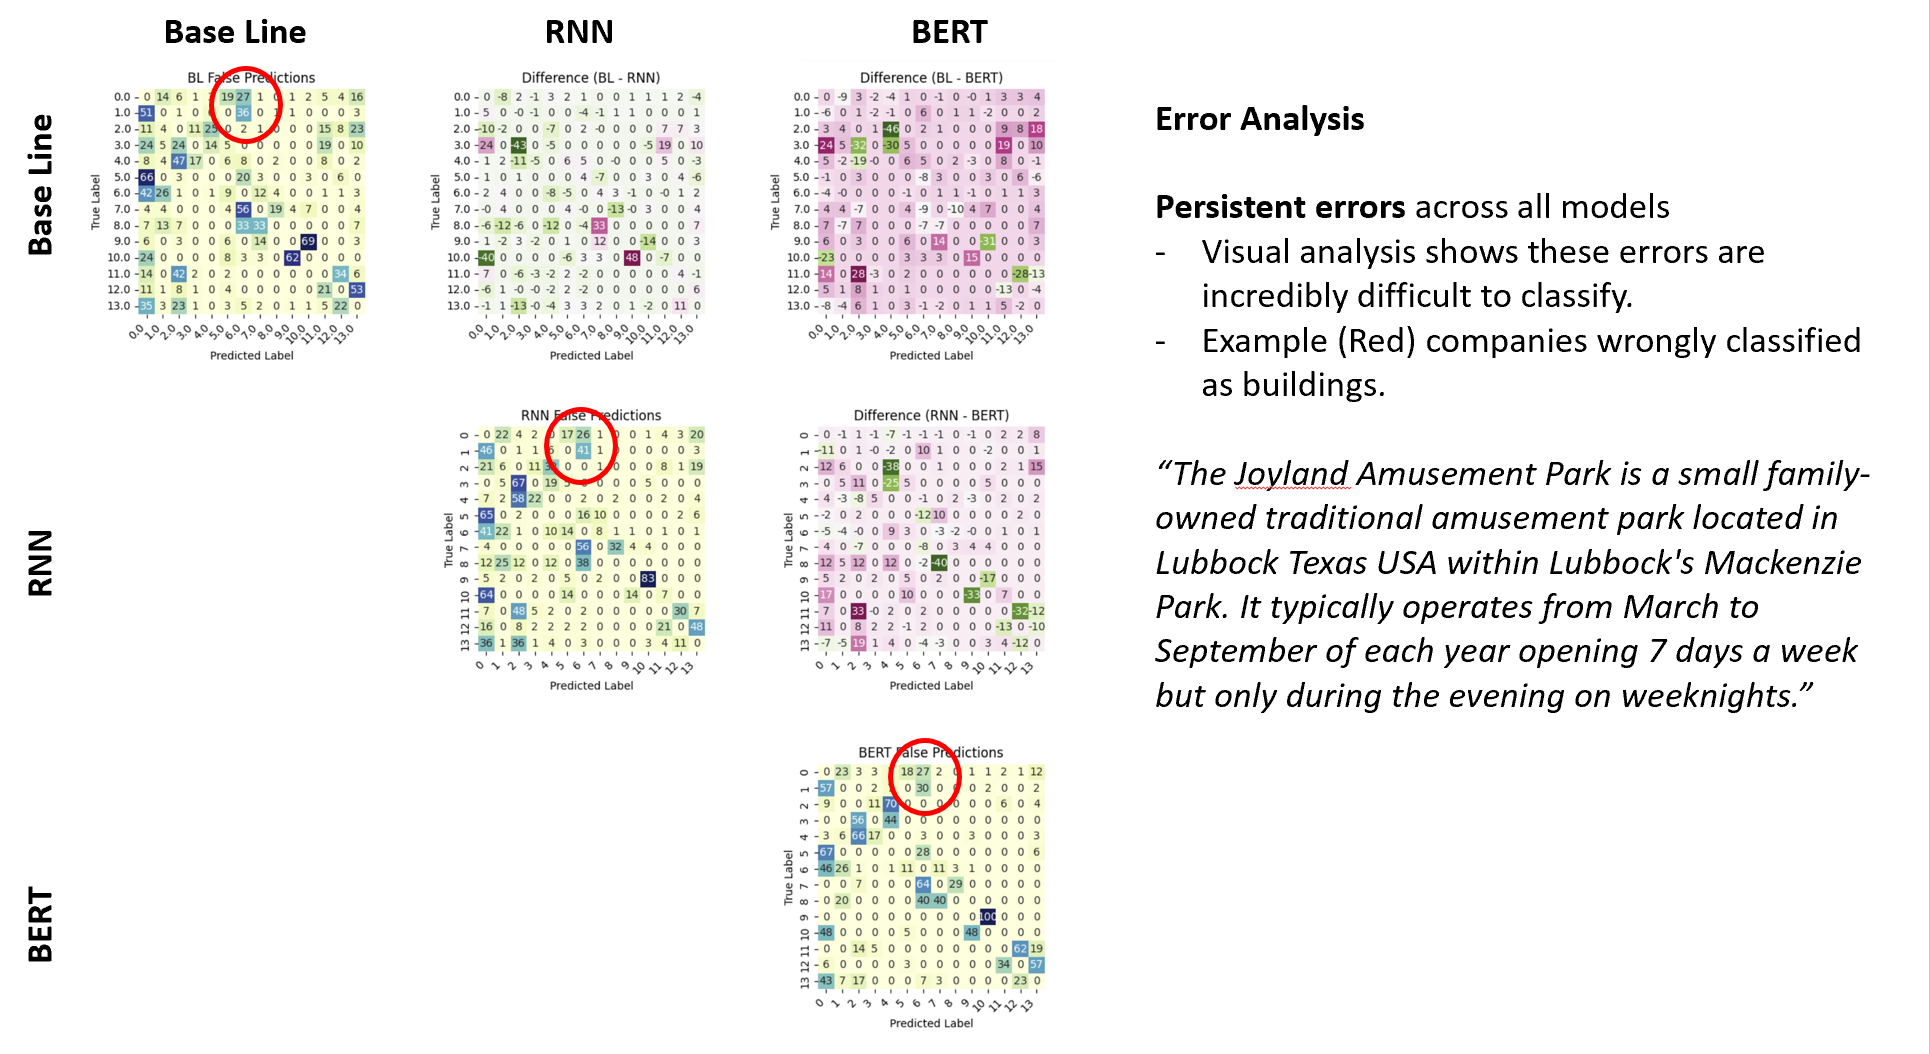

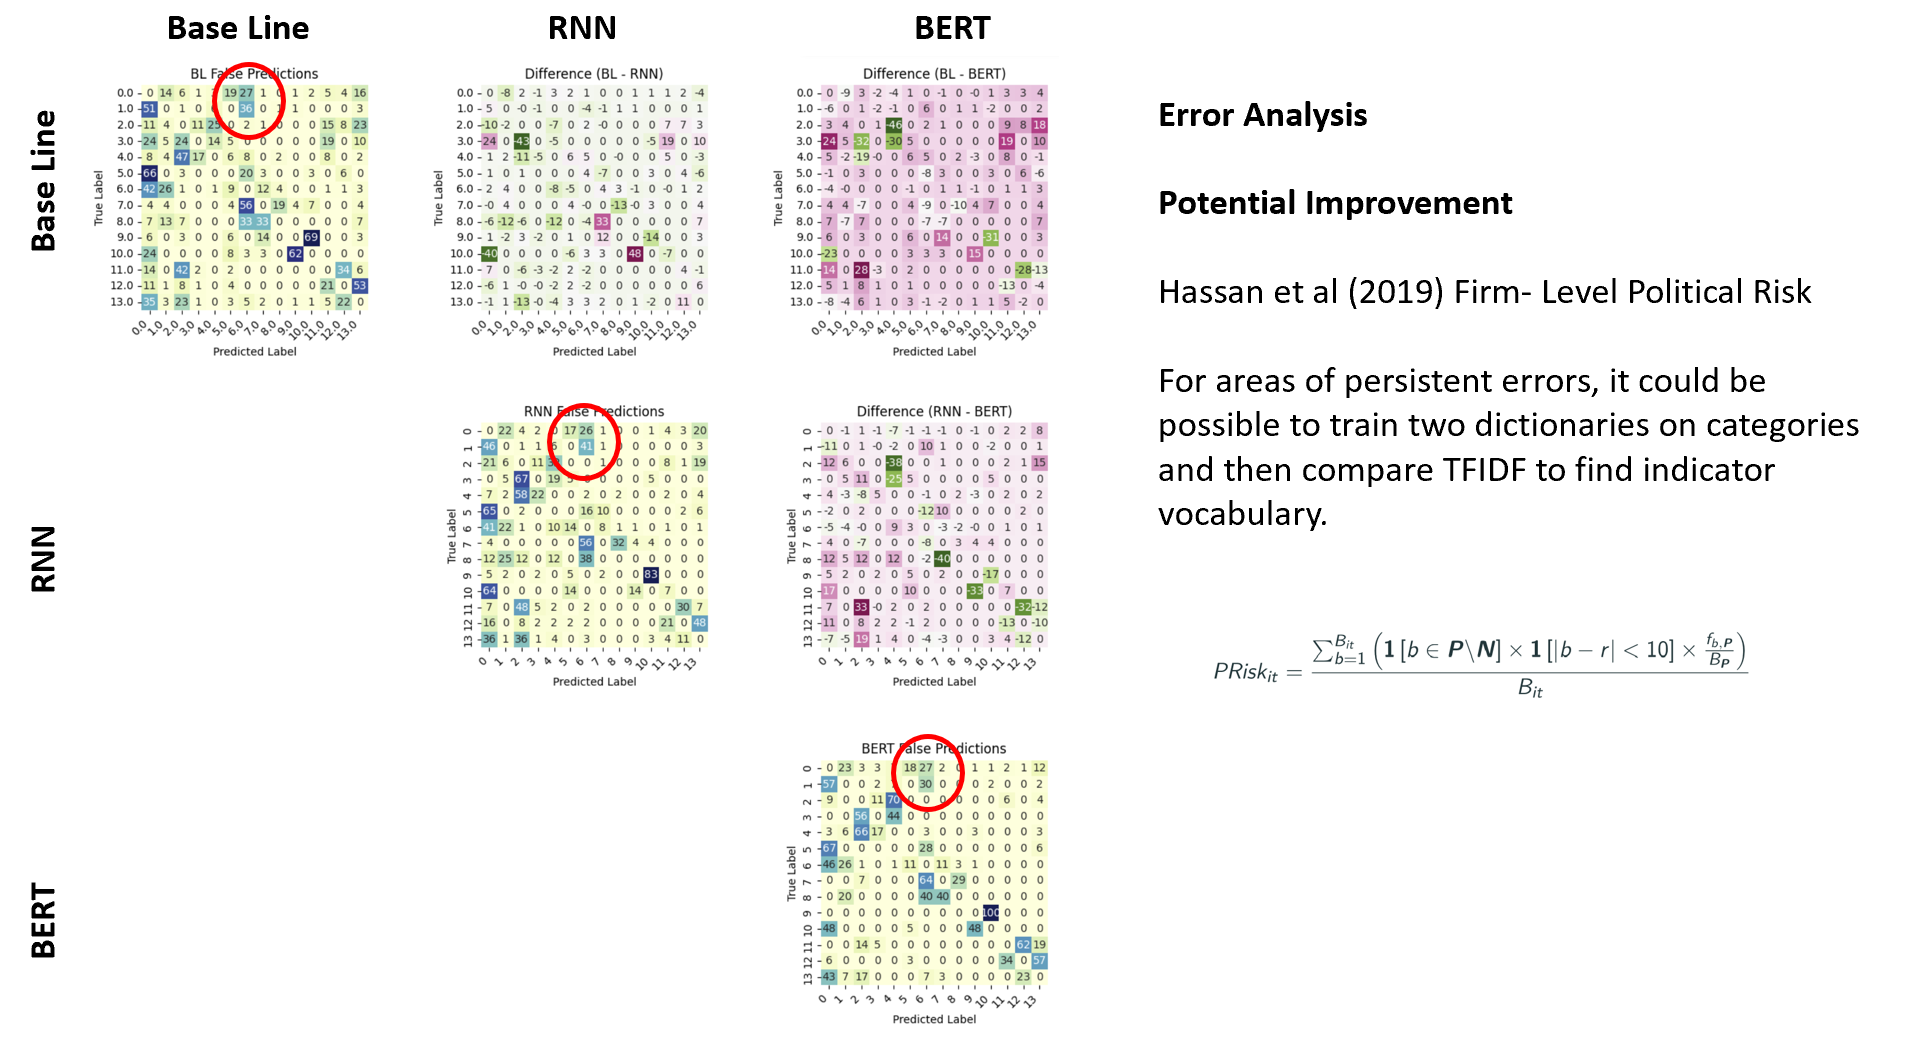

Below are example of text classified as builings, which should have been companies

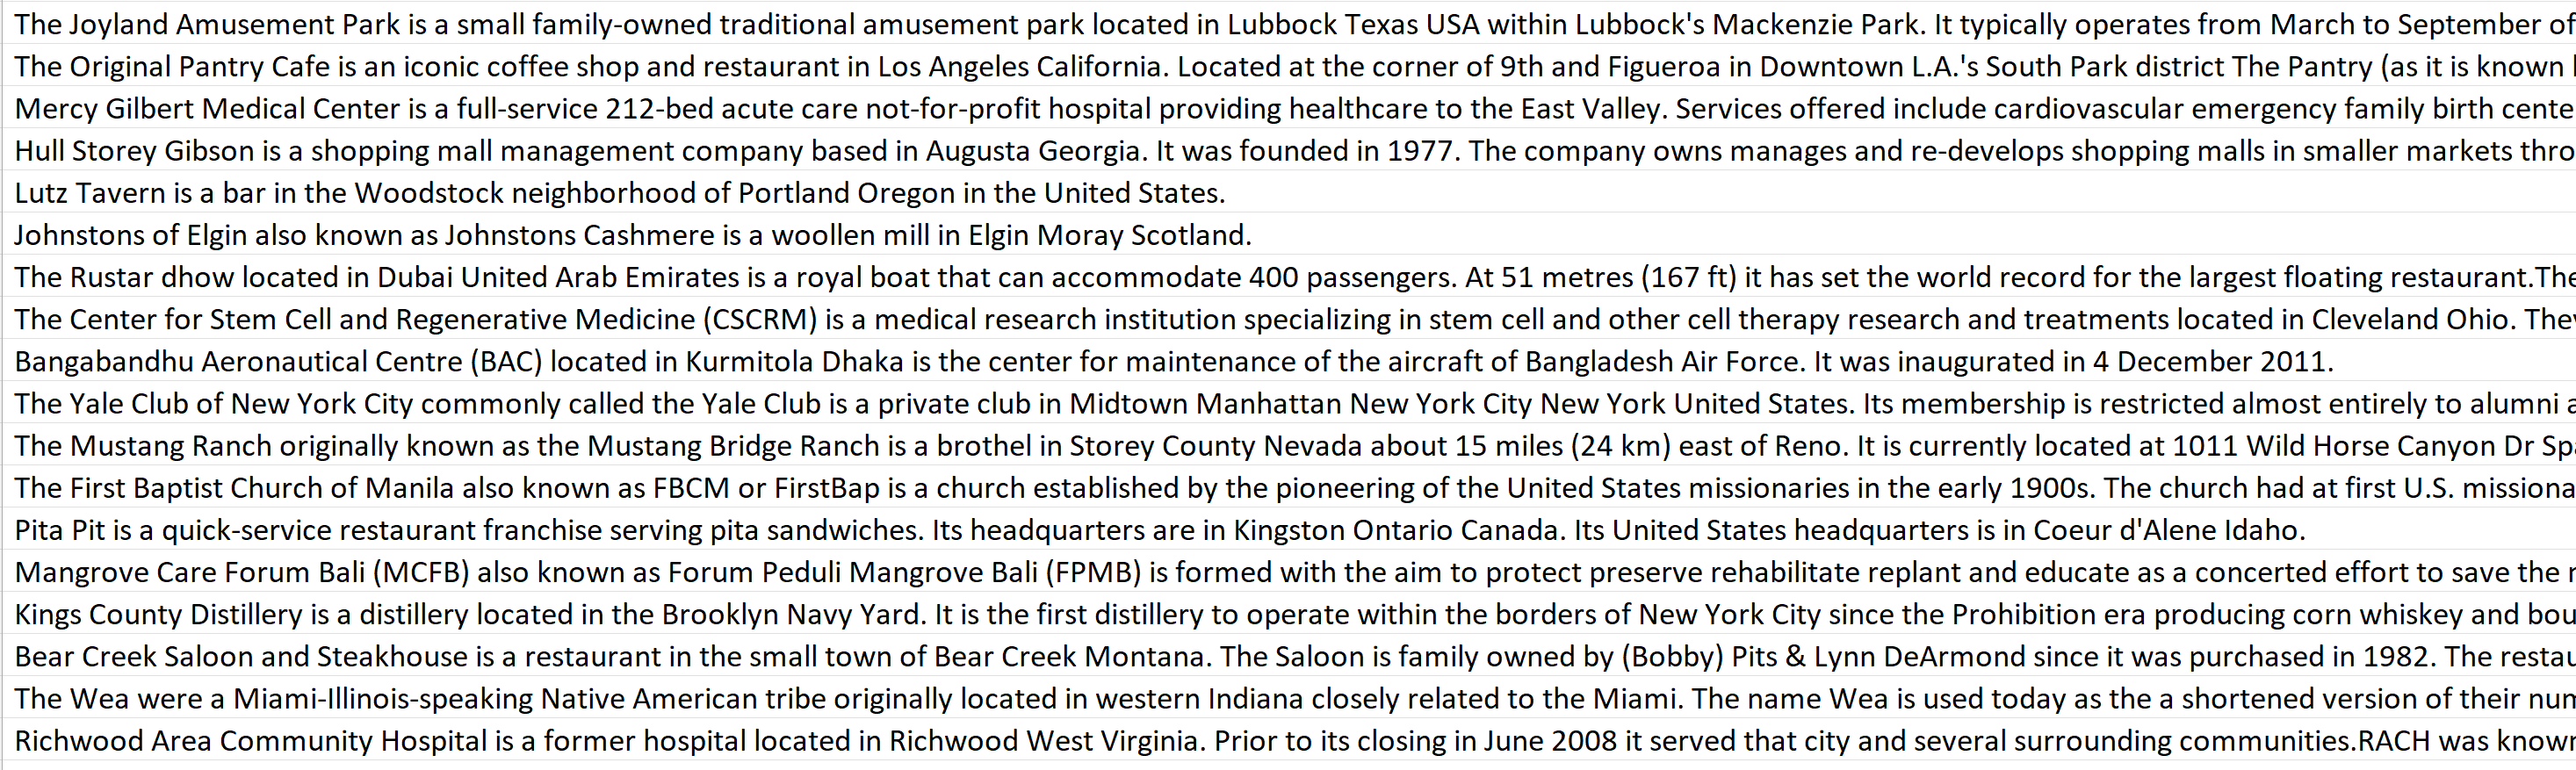

### After training vocabulary specific to the persistent errors, this TFIDF can be added to the traing models. 

### The chart shows "when there was a false prediction, how close was the model to predicting the correct answer" - for the baseline model

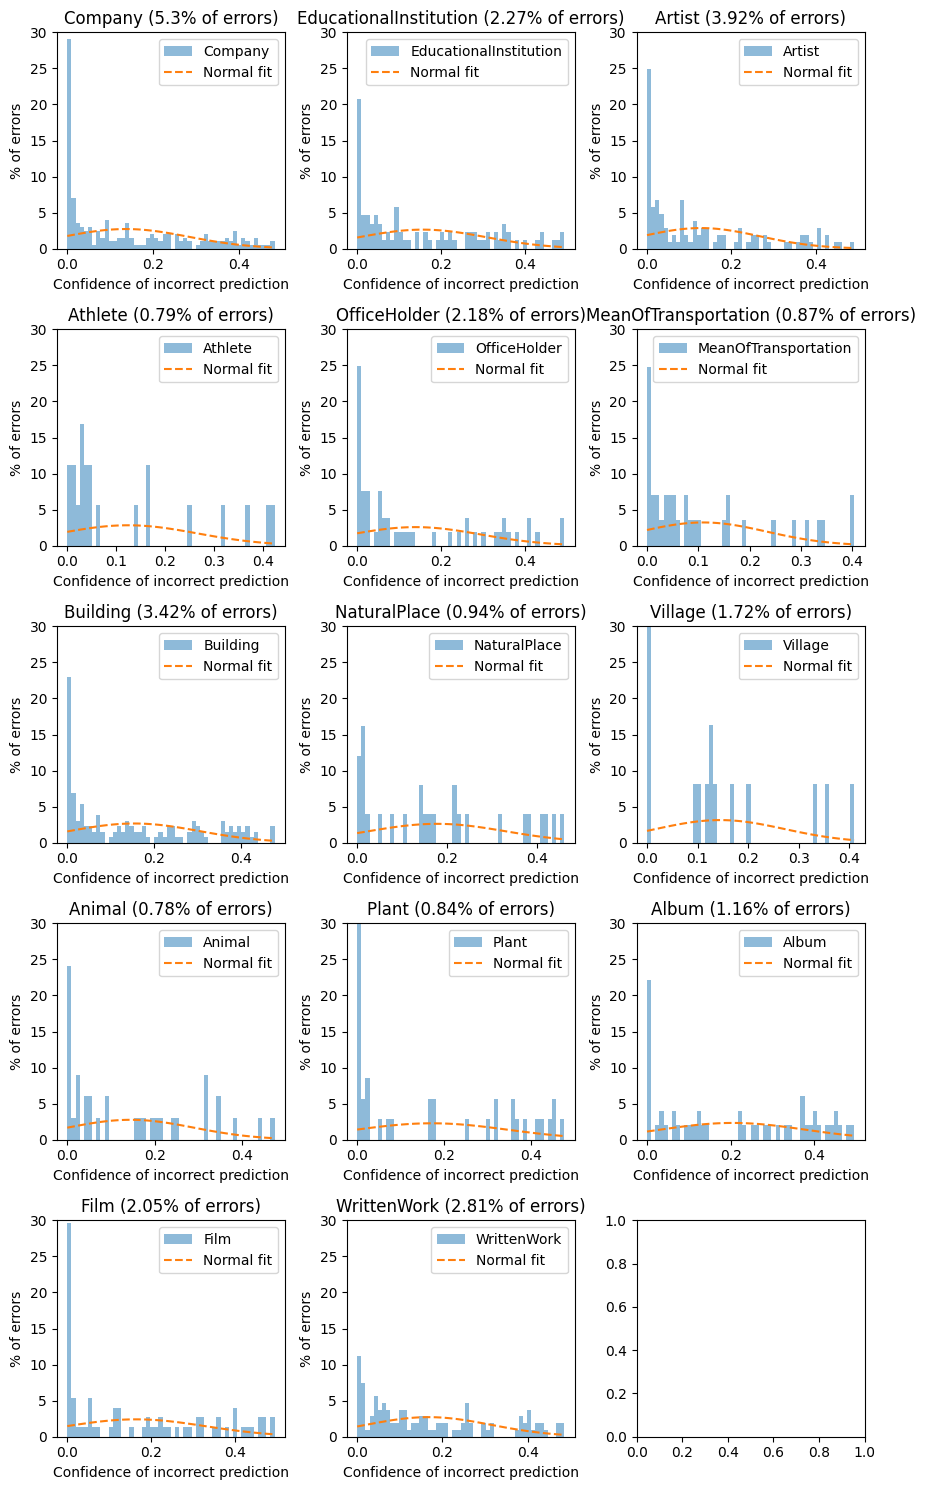

In [155]:

BL_errors["conf_wrong"] = 0

# loop over the rows in the DataFrame
for i, row in BL_errors.iterrows():
    try:
        # if correct_pred is False, set conf_wrong to the appropriate Prob. column value
        if not row["correct_pred"]:
            col_name = "Prob. " + str(int(row["label"]))
            col_idx = BL_errors.columns.get_loc(col_name)
            BL_errors.at[i, "conf_wrong"] = row.iloc[col_idx]
        # if correct_pred is True, conf_wrong remains 0
    except KeyError:
        # if there is a KeyError (e.g. column name doesn't exist), set conf_wrong to 0 and print row number
        BL_errors.at[i, "conf_wrong"] = 0
        print("Error at row", i)

# print the updated DataFrame
print(BL_errors)



# create a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# set the y-axis limit to 30%
y_limit = 30
x_limit = 0.5

# loop over the labels and plot a histogram for each
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(9, 15), tight_layout=True)
for i, (label_value, label_name) in enumerate(label_lookup.items()):
    # select the rows with the current label value and exclude conf_wrong values of 0
    conf_wrong_values = BL_errors[(BL_errors["label"] == label_value) & (BL_errors["conf_wrong"] != 0)]["conf_wrong"]
    
    # calculate proportion of errors
    prop_errors = (len(conf_wrong_values) / len(BL_errors[BL_errors["label"] == label_value])) * 100

    # plot the histogram using numpy and matplotlib
    ax = axs[i//3, i%3]  # select the appropriate subplot
    n, bins, patches = ax.hist(conf_wrong_values, bins=50, density=True, alpha=0.5, label=label_name)
    y = ((1 / (np.sqrt(2 * np.pi) * np.std(conf_wrong_values))) *
         np.exp(-0.5 * (1 / np.std(conf_wrong_values) * (bins - np.mean(conf_wrong_values))) ** 2))
    ax.plot(bins, y, '--', label='Normal fit')
    ax.set_xlabel('Confidence of incorrect prediction')
    ax.set_ylabel('% of errors')
    ax.set_title( label_name + ' ({}% of errors)'.format(round(prop_errors, 2)))
    ax.set_ylim([0, y_limit])
    ax.legend()

# show the plot
plt.show()


## Error Analysis - RNN Model

In [229]:
incorrect_predictions = data_test[data_test['correct_pred'] == False]


In [88]:
RNN_errors = pd.read_csv('data/results/models_results/RNN_errors_analysis.csv')

In [133]:
# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the index using the label lookup dictionary
false_counts.rename(index=label_lookup, inplace=True)

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
print(false_counts_sorted)


label
Company                   157.0
Building                   91.0
Artist                     72.0
WrittenWork                72.0
EducationalInstitution     71.0
Film                       61.0
MeanOfTransportation       51.0
OfficeHolder               45.0
Album                      44.0
Animal                     41.0
NaturalPlace               25.0
Athlete                    21.0
Plant                      14.0
Village                     8.0
dtype: float64


In [134]:
# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the columns and index labels
false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
(false_counts_sorted)


True Category
Company                   157.0
Building                   91.0
Artist                     72.0
WrittenWork                72.0
EducationalInstitution     71.0
Film                       61.0
MeanOfTransportation       51.0
OfficeHolder               45.0
Album                      44.0
Animal                     41.0
NaturalPlace               25.0
Athlete                    21.0
Plant                      14.0
Village                     8.0
dtype: float64

## Error analysis - Base Line Model 

In [89]:
BL_errors = pd.read_csv('data/results/models_results/prediction_df_LR.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_28853/3871639168.py:1: DtypeWarning: Columns (2,3,19) have mixed types. Specify dtype option on import or set low_memory=False.
  BL_errors = pd.read_csv('data/results/models_results/prediction_df_LR.csv')


In [139]:

label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}


false_counts = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count")


false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)
(false_counts_sorted)


True Category
Company                   207.0
Building                  137.0
WrittenWork               110.0
Artist                    106.0
EducationalInstitution     88.0
Film                       75.0
OfficeHolder               53.0
Album                      50.0
Plant                      37.0
MeanOfTransportation       35.0
Animal                     35.0
NaturalPlace               27.0
Athlete                    21.0
Village                    15.0
dtype: float64

In [141]:
# output the BL_errors DataFrame to a CSV file
BL_errors.to_csv("data/results/models_results/BL_errors.csv", index=False)


## Error analysis - BERT Model 

In [223]:
max_vals = []
for vector in predictions:

    max_val = np.max(vector)
    max_index = np.where(vector == max_val)[0][0]
    max_vals.append(max_index)
    
data_test["pred"] = max_vals

In [224]:
data_test["correct_pred"] = data_test.apply(lambda row: True if row["pred"]==row["label"] else False, axis = 1)

In [231]:
data_test.to_csv('data/results/models_results/test_errors_BERT.csv')

In [90]:
BERT_errors = pd.read_csv('data/results/models_results/test_errors_BERT.csv')

In [146]:
(BERT_errors.dtypes)

Unnamed: 0       int64
label            int64
title           object
content         object
words_count      int64
pred             int64
correct_pred      bool
dtype: object

In [157]:
# define a dictionary to map label values to lookup values
label_lookup = {0: "Company", 1: "EducationalInstitution", 2: "Artist", 3: "Athlete", 4: "OfficeHolder",
                5: "MeanOfTransportation", 6: "Building", 7: "NaturalPlace", 8: "Village", 9: "Animal",
                10: "Plant", 11: "Album", 12: "Film", 13: "WrittenWork"}

# use pivot_table to count False values by label and pred
false_counts = pd.pivot_table(BERT_errors[BERT_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count")

# rename the columns and index labels
false_counts.rename(columns={"count": "Count of false predictions"}, index=label_lookup, inplace=True)
false_counts.index.name = "True Category"

# sort the table by the highest count of False values
false_counts_sorted = false_counts.sum(axis=1).sort_values(ascending=False)

# print the sorted table
(false_counts_sorted)


True Category
Company                   100.0
Building                   74.0
EducationalInstitution     56.0
Artist                     47.0
OfficeHolder               35.0
Film                       35.0
WrittenWork                30.0
Plant                      21.0
Album                      21.0
MeanOfTransportation       18.0
NaturalPlace               14.0
Athlete                     9.0
Animal                      6.0
Village                     5.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

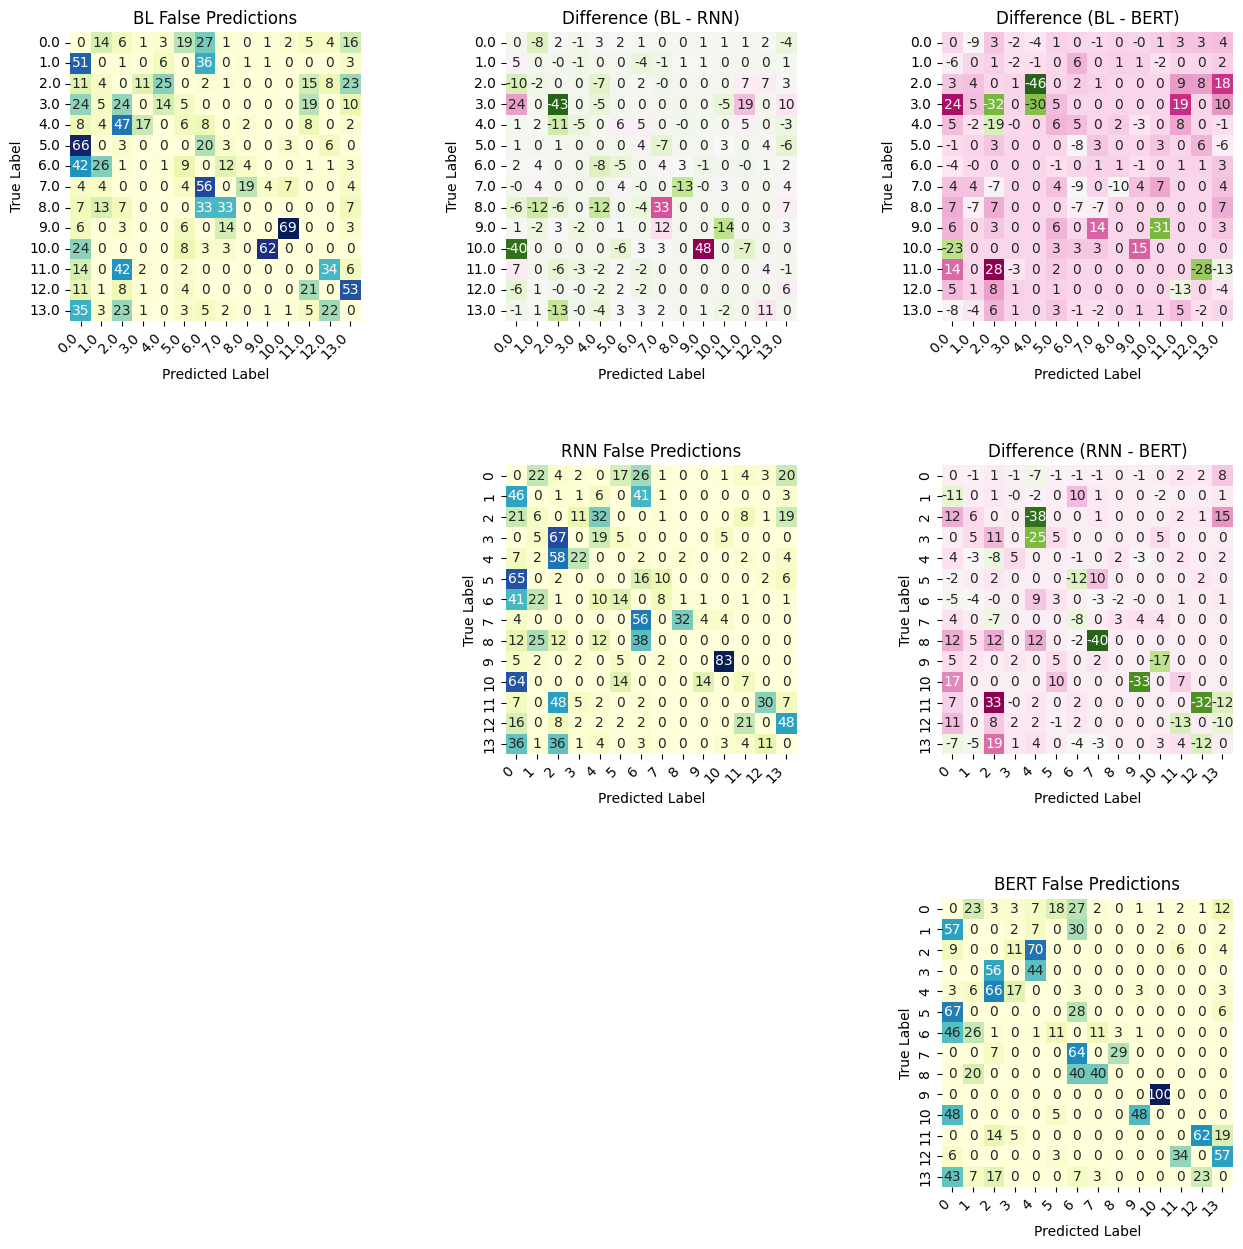

In [168]:
# create pivot tables to count False values by label and pred for each model
false_counts_bl = pd.pivot_table(BL_errors[BL_errors["correct_pred"] == False], index="label", columns="Predict", values="correct_pred", aggfunc="count", fill_value=0)
false_counts_rnn = pd.pivot_table(RNN_errors[RNN_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count", fill_value=0)
false_counts_bert = pd.pivot_table(BERT_errors[BERT_errors["correct_pred"] == False], index="label", columns="pred", values="correct_pred", aggfunc="count", fill_value=0)

# normalize pivot tables to show % of wrong predictions for each label
false_counts_norm_bl = false_counts_bl.div(false_counts_bl.sum(axis=1), axis=0) * 100
false_counts_norm_rnn = false_counts_rnn.div(false_counts_rnn.sum(axis=1), axis=0) * 100
false_counts_norm_bert = false_counts_bert.div(false_counts_bert.sum(axis=1), axis=0) * 100

# calculate percentage difference between pairs of models
diff_counts_br = (false_counts_norm_bl - false_counts_norm_rnn).round(2)
diff_counts_rb = 0*(false_counts_norm_rnn - false_counts_norm_bl).round(2)
diff_counts_bb = (false_counts_norm_bl - false_counts_norm_bert).round(2)
diff_counts_bertb = 0*(false_counts_norm_bert - false_counts_norm_bl).round(2)
diff_counts_rr = (false_counts_norm_rnn - false_counts_norm_bert).round(2)
diff_counts_bertr = 0*(false_counts_norm_bert - false_counts_norm_rnn).round(2)

# create subplots and plot heatmaps for each difference pivot table
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.heatmap(false_counts_norm_bl, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[0,0])
axs[0,0].set_title("BL False Predictions")
axs[0,0].set_xlabel("Predicted Label")
axs[0,0].set_ylabel("True Label")
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(false_counts_norm_rnn, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[1,1])
axs[1,1].set_title("RNN False Predictions")
axs[1,1].set_xlabel("Predicted Label")
axs[1,1].set_ylabel("True Label")
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.heatmap(false_counts_norm_bert, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False, ax=axs[2,2])
axs[2,2].set_title("BERT False Predictions")
axs[2,2].set_xlabel("Predicted Label")
axs[2,2].set_ylabel("True Label")
axs[2,2].set_xticklabels(axs[2,2].get_xticklabels(), rotation=45, horizontalalignment='right')

# create heatmap for difference between BL and RNN
sns.heatmap(diff_counts_br, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[0,1])
axs[0,1].set_title("Difference (BL - RNN)")
axs[0,1].set_xlabel("Predicted Label")
axs[0,1].set_ylabel("True Label")
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[1,0].axis('off')

# create heatmap for difference between BL and BERT
sns.heatmap(diff_counts_bb, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[0,2])
axs[0,2].set_title("Difference (BL - BERT)")
axs[0,2].set_xlabel("Predicted Label")
axs[0,2].set_ylabel("True Label")
axs[0,2].set_xticklabels(axs[0,2].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[2,0].axis('off')

# create heatmap for difference between RNN and BERT
sns.heatmap(diff_counts_rr, cmap="PiYG_r", annot=True, fmt=".0f", cbar=False, ax=axs[1,2])
axs[1,2].set_title("Difference (RNN - BERT)")
axs[1,2].set_xlabel("Predicted Label")
axs[1,2].set_ylabel("True Label")
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=45, horizontalalignment='right')

axs[2,1].axis('off')

# adjust layout and show plot
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show



![image.png](./images/Error%20Analysis%201.png)

![image.png](./images/Error%20Analysis%202.png)

## Code for visual inspection for Ture category  0 which were predicted as category 6 

In [169]:
# select rows with label == 0 and pred == 6
selected_rows = RNN_errors[(RNN_errors["label"] == 0) & (RNN_errors["pred"] == 6)]

# save selected rows to a CSV file
selected_rows.to_csv("data/results/models_results/selected_rows.csv", index=False)
